In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
m = pd.read_csv("../../data/raw/KOBIS_개봉일람.csv", encoding="cp949")

m

순번         영화명           감독                           제작사   
0          1          명량          김한민                     (주)빅스톤픽쳐스  \
1          2        극한직업          이병헌  (주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠   
2          3   신과함께-죄와 벌          김용화         리얼라이즈픽쳐스(주)(주)덱스터스튜디오   
3          4        국제시장          윤제균            (주)제이케이필름(주)씨제이이엔엠   
4          5  어벤져스: 엔드게임   안소니 루소조 루소                           NaN   
...      ...         ...          ...                           ...   
27399  27400    V2 폭파대작전  엔조 G. 카스텔라리                           NaN   
27400  27401       W의 비극          김수형                      한진흥업주식회사   
27401  27402         X게임    엠마뉴엘 그리센티                           NaN   
27402  27403       Y의 체험          이장호                       판영화사(주)   
27403  27404     YMCA야구단          김현석                  (주)명필름CJ ENM   

                      수입사                 배급사         개봉일  영화유형 영화형태    국적   
0                     NaN           (주)씨제이이엔엠  2014-07-30  개봉영화   장편    한국  \
1                     NaN           (주)씨제이이엔엠  2019-01-23  개봉영화   장편    한국   
2                     NaN       롯데쇼핑㈜롯데엔터테인먼트  2017-12-20  개봉영화   장편    한국   
3                     NaN           (주)씨제이이엔엠  2014-12-17  개봉영화   장편    한국   
4      월트디즈니컴퍼니코리아 유한책임회사  월트디즈니컴퍼니코리아 유한책임회사  2019-04-24  개봉영화   장편    미국   
...                   ...                 ...         ...   ...  ...   ...   
27399           (주)동아수출공사                 NaN  1978-12-21  개봉영화   장편  이탈리아   
27400                 NaN                 NaN  1985-06-09  개봉영화   장편    한국   
27401             (주)한영필림                 NaN  1997-07-05  개봉영화   장편  이탈리아   
27402                 NaN                 NaN  1987-10-03  개봉영화   장편    한국   
27403                 NaN                 NaN  2002-10-02  개봉영화   장편    한국   

       전국 스크린수        전국 매출액    전국 관객수        서울 매출액   서울 관객수       장르   
0         1587  1.357484e+11  17613682  3.312123e+10  4163666       사극  \
1         1978  1.396480e+11  16264944  3.185866e+10  3638287      코미디   
2         1912  1.156987e+11  14410754  2.753083e+10  3346172      판타지   
3          966  1.108280e+11  14245998  2.584252e+10  3233946      드라마   
4         2835  1.221827e+11  13934592  3.357714e+10  3597963       액션   
...        ...           ...       ...           ...      ...      ...   
27399        0           NaN         0           NaN   174276       액션   
27400        0  0.000000e+00         0  0.000000e+00     8624      드라마   
27401        0  0.000000e+00         0  0.000000e+00      434       범죄   
27402        0  0.000000e+00         0  0.000000e+00    37520  성인물(에로)   
27403        0           NaN         0           NaN   560000      드라마   

              등급  영화구분  
0       15세이상관람가  일반영화  
1       15세이상관람가  일반영화  
2       12세이상관람가  일반영화  
3       12세이상관람가  일반영화  
4       12세이상관람가  일반영화  
...          ...   ...  
27399        NaN  일반영화  
27400    연소자관람불가  일반영화  
27401    연소자관람불가  일반영화  
27402  고등학생이상관람가  일반영화  
27403      전체관람가  일반영화  

[27404 rows x 18 columns]

In [5]:
m.describe()

순번       전국 스크린수        전국 매출액        전국 관객수        서울 매출액   
count  27404.000000  27404.000000  2.634800e+04  2.740400e+04  2.634200e+04  \
mean   13702.500000     58.341629  7.749382e+08  1.213845e+05  2.238365e+08   
std     7910.997725    193.162385  5.245907e+09  6.905403e+05  1.444514e+09   
min        1.000000      0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6851.750000      0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%    13702.500000      1.000000  6.000000e+03  2.000000e+00  0.000000e+00   
75%    20553.250000     12.000000  7.585250e+06  2.280250e+03  4.373638e+06   
max    27404.000000   2948.000000  1.396480e+11  1.761368e+07  4.054752e+10   

             서울 관객수  
count  2.740400e+04  
mean   5.216842e+04  
std    2.013055e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    9.395000e+02  
75%    1.678475e+04  
max    4.163666e+06

In [7]:
c = m[["전국 스크린수", "전국 매출액", "전국 관객수", "서울 매출액", "서울 관객수"]]

c.corr()

전국 스크린수    전국 매출액    전국 관객수    서울 매출액    서울 관객수
전국 스크린수  1.000000  0.710314  0.622815  0.701445  0.529961
전국 매출액   0.710314  1.000000  0.906154  0.987997  0.805018
전국 관객수   0.622815  0.906154  1.000000  0.897671  0.910360
서울 매출액   0.701445  0.987997  0.897671  1.000000  0.816086
서울 관객수   0.529961  0.805018  0.910360  0.816086  1.000000

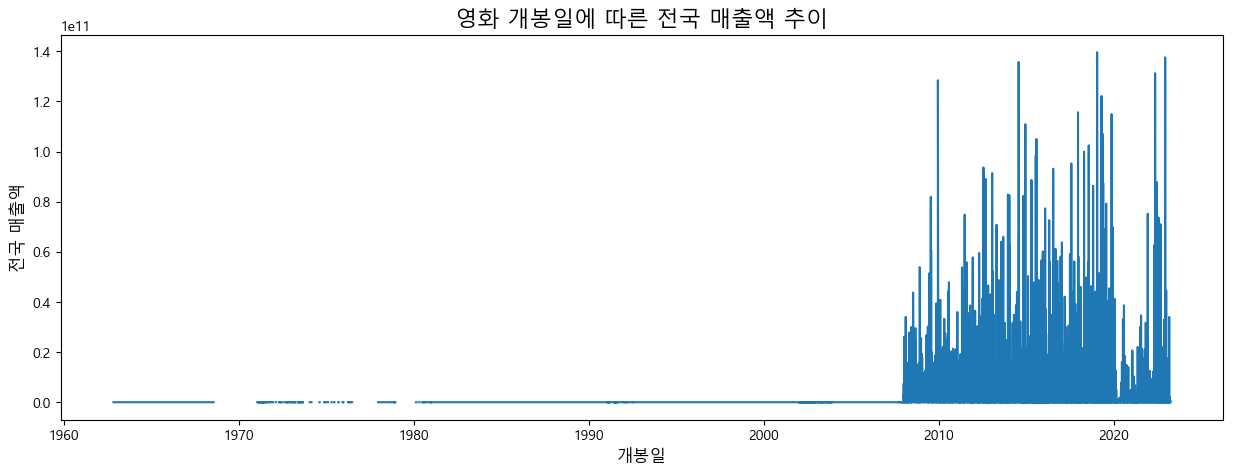

In [8]:
m['개봉일'] = pd.to_datetime(m['개봉일'])
m = m.sort_values(by=['개봉일'])

plt.figure(figsize=(15, 5))
plt.plot(m['개봉일'], m['전국 매출액'])
plt.title('영화 개봉일에 따른 전국 매출액 추이', fontsize=16)
plt.xlabel('개봉일', fontsize=12)
plt.ylabel('전국 매출액', fontsize=12)
plt.show()

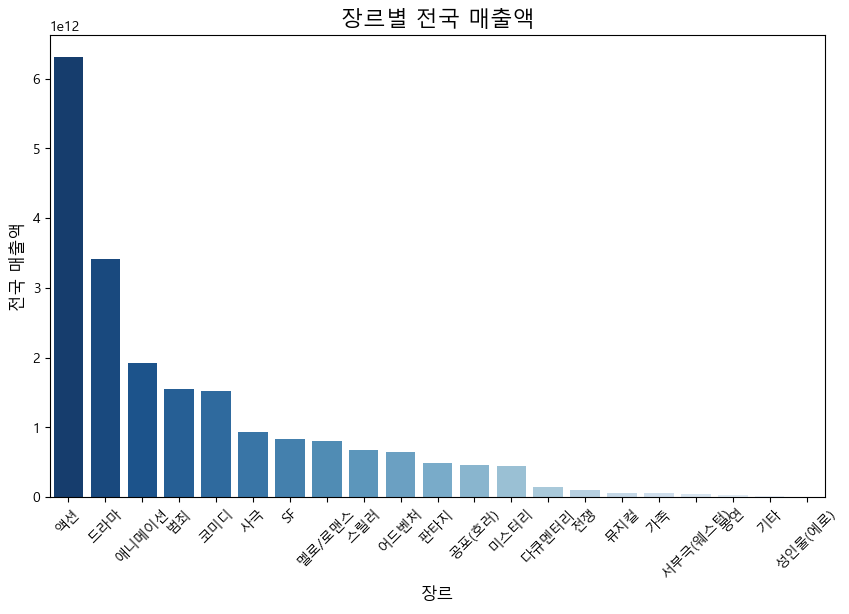

In [9]:
genre_grouped = m.groupby('장르')['전국 매출액'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_grouped.index, y=genre_grouped.values, palette='Blues_r')
plt.title('장르별 전국 매출액', fontsize=16)
plt.xlabel('장르', fontsize=12)
plt.ylabel('전국 매출액', fontsize=12)
plt.xticks(rotation=45)
plt.show()

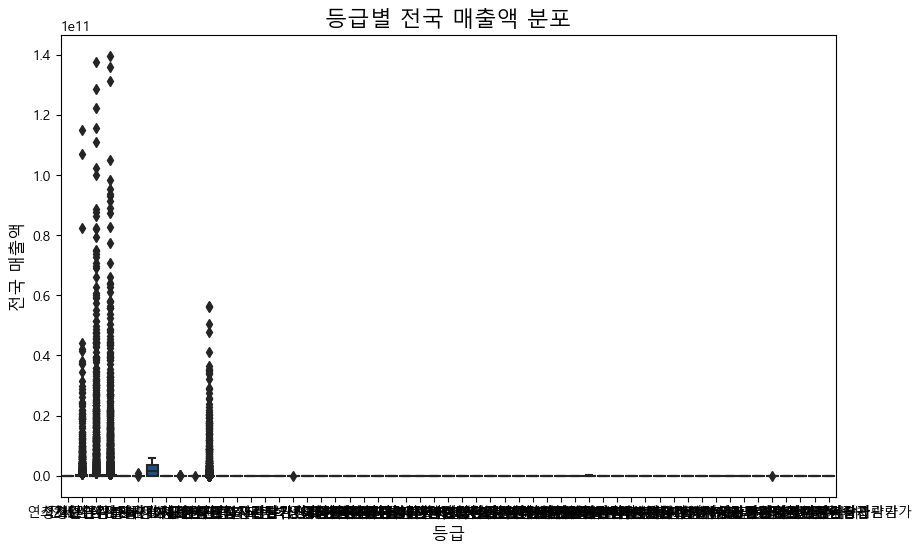

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='등급', y='전국 매출액', data=m, palette='Blues_r')
plt.title('등급별 전국 매출액 분포', fontsize=16)
plt.xlabel('등급', fontsize=12)
plt.ylabel('전국 매출액', fontsize=12)
plt.show()

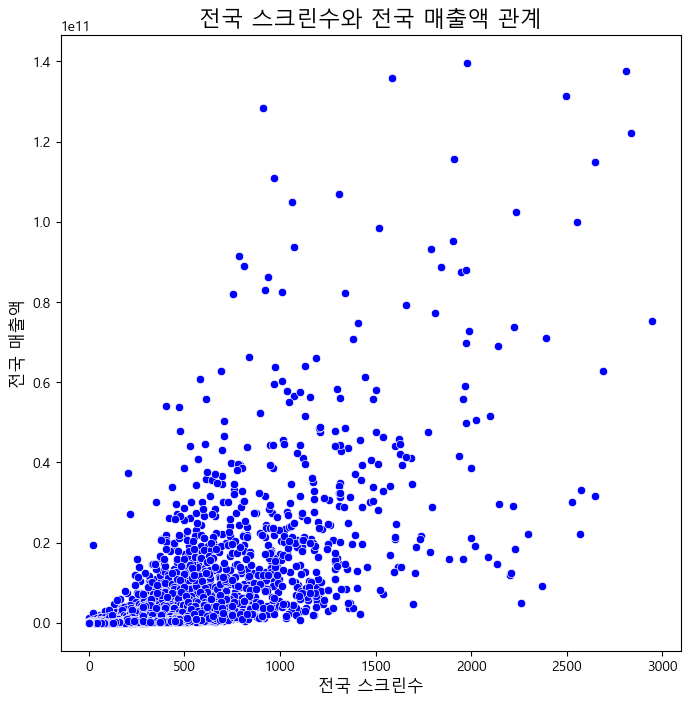

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='전국 스크린수', y='전국 매출액', data=m, color='b')
plt.title('전국 스크린수와 전국 매출액 관계', fontsize=16)
plt.xlabel('전국 스크린수', fontsize=12)
plt.ylabel('전국 매출액', fontsize=12)
plt.show()

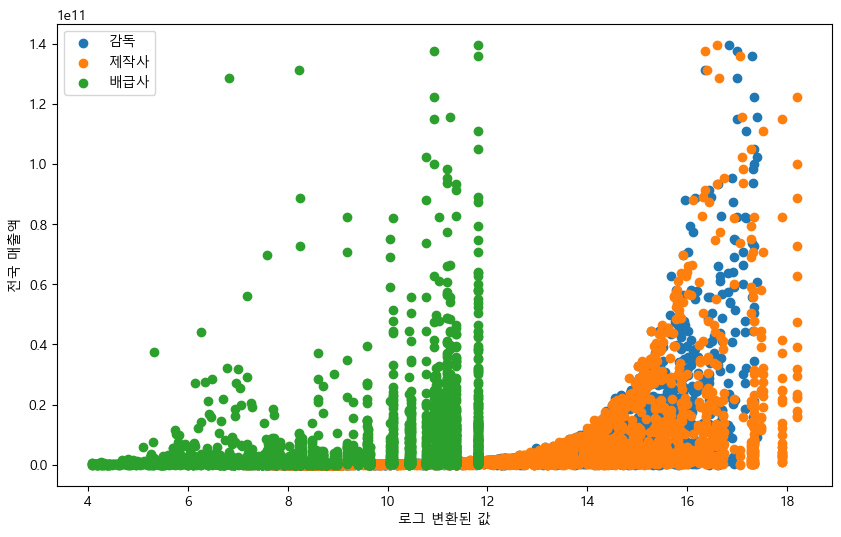

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(m['감독'], m['전국 매출액'], label='감독')
plt.scatter(m['제작사'], m['전국 매출액'], label='제작사')
plt.xlabel('로그 변환된 값')
plt.ylabel('전국 매출액')
plt.legend()
plt.show()

In [12]:
fig = px.histogram(m, x="국적")

fig.show()

In [13]:
fig = px.bar(m, y="국적", x="전국 스크린수", color="국적")

fig.show()

In [14]:
fig = px.bar(m, y="국적", x="전국 매출액", color="국적")

fig.show()

In [15]:
fig = px.histogram(m, x="장르")

fig.show()

In [16]:
fig = px.bar(m, y="장르", x="전국 스크린수", color="장르")

fig.show()

In [17]:
fig = px.bar(m, y="장르", x="전국 매출액", color="장르")

fig.show()

In [18]:
fig = px.bar(m, y="장르", x="전국 관객수", color="장르")

fig.show()

In [19]:
fig = px.histogram(m, x="등급")

fig.show()

In [20]:
fig = px.pie(m, values="전국 스크린수", names="등급")

fig.show()

In [21]:
fig = px.pie(m, values="전국 매출액", names="등급")

fig.show()

In [22]:
fig = px.pie(m, values="전국 관객수", names="등급")

fig.show()